<h1 align='center'> Using a NN to fit the data </h1>

Backpropagating erroes to parameters and then updating parameters by taking the gradient w.r.t loss is the same no matter what the underlying model is

![mental model](../assets/mental%20model.png)

In [1]:
import torch
import matplotlib.pyplot as plt
from torchinfo import summary

device = torch.device( "cuda" if torch.cuda.is_available() else 'cpu' )

$o=f(w*x+b)$

In [2]:
class Net(torch.nn.Module):
    def __init__(self,input_size,output_size) -> None:
        super(Net,self).__init__()
        
        self.linear     = torch.nn.Linear(in_features=input_size,out_features=output_size,bias=True)
        self.activation = torch.nn.Tanh()
        with torch.no_grad():
            self.linear.weight.fill_(.5)
            self.linear.bias.fill_(0.2)
    
    def forward(self,x):
        return self.activation(self.linear(x))

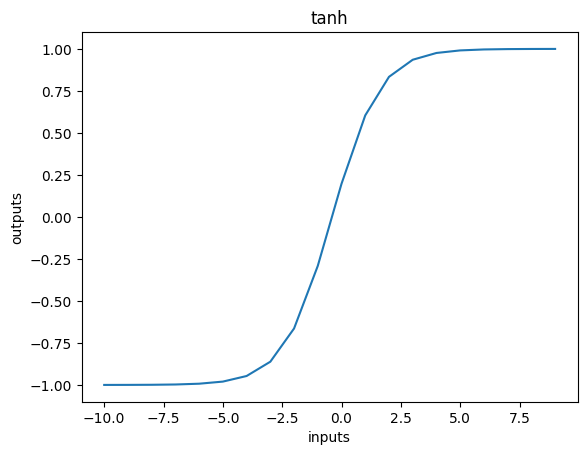

In [3]:
tanh = Net(1,1).to(device=device)

inputs:torch.Tensor = torch.arange(-10,10,1,device=device,dtype=torch.float32)
outputs = []
for i in inputs.unsqueeze(dim=1): outputs.append(tanh(i).item())
plt.plot([_.detach().cpu() for _ in inputs],outputs)
plt.title("tanh")
plt.xlabel('inputs')
plt.ylabel("outputs")
plt.show()

![MODEL](../assets/MODEL.png)

Real World data is so complex. In order to acheive non-linear all we need is activation function.

If not there, at end of the day, it'll be one monolithic linear equation.

In [4]:
tanh     = torch.nn.Tanh()
hardtanh = torch.nn.Hardtanh(min_val=-1,max_val=1,)
sigmoid  = torch.nn.Sigmoid()
softplus = torch.nn.Softplus(beta=2,threshold=1)
relu     = torch.nn.ReLU()
leakyrelu= torch.nn.LeakyReLU(negative_slope=0.2) 
gelu     = torch.nn.GELU()

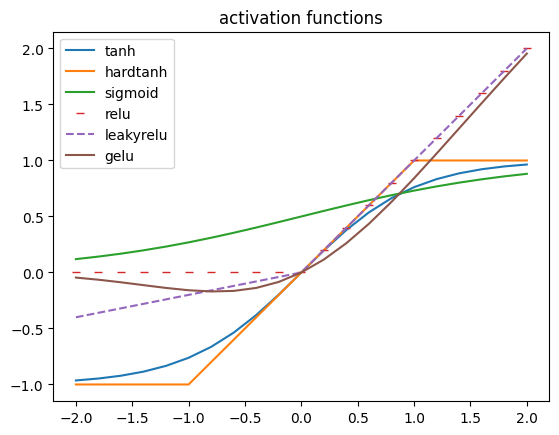

In [5]:
inputs:torch.Tensor = torch.arange(-2,2.2,0.2,device=device,dtype=torch.float32)

plt.plot(inputs.detach().cpu(),tanh(inputs).detach().cpu(),label='tanh')
plt.plot(inputs.detach().cpu(),hardtanh(inputs).detach().cpu(),label='hardtanh')
plt.plot(inputs.detach().cpu(),sigmoid(inputs).detach().cpu(),label='sigmoid')
plt.plot(inputs.detach().cpu(),relu(inputs).detach().cpu(),'_',label='relu')
plt.plot(inputs.detach().cpu(),leakyrelu(inputs).detach().cpu(),'--',label='leakyrelu')
plt.plot(inputs.detach().cpu(),gelu(inputs).detach().cpu(),'-',label='gelu')
plt.legend()
plt.title("activation functions")
plt.show()

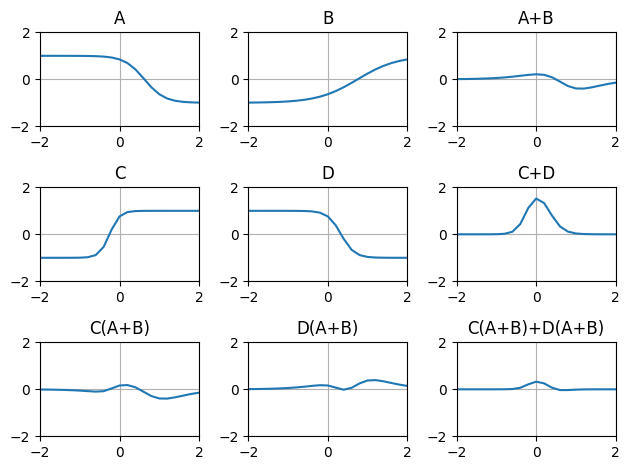

In [6]:
A = tanh(-2*inputs + 1.25)
B = tanh( 1*inputs - 0.75)
C = tanh( 4*inputs + 1.00)
D = tanh(-3*inputs + 1.0)

plt.rcParams['axes.grid'] = True
plt.rcParams['figure.autolayout']  = True
fig,axs =plt.subplots(3,3)

axs[0,0].plot(inputs.detach().cpu(), A.detach().cpu())
axs[0,0].set_xlim([-2,2])
axs[0,0].set_ylim([-2,2])
axs[0,0].set_title("A")

axs[0,1].plot(inputs.detach().cpu(), B.detach().cpu())
axs[0,1].set_xlim([-2,2])
axs[0,1].set_ylim([-2,2])
axs[0,1].set_title("B")

axs[0,2].plot(inputs.detach().cpu(), (A+B).detach().cpu())
axs[0,2].set_xlim([-2,2])
axs[0,2].set_ylim([-2,2])
axs[0,2].set_title("A+B")

axs[1,0].plot(inputs.detach().cpu(), C.detach().cpu())
axs[1,0].set_xlim([-2,2])
axs[1,0].set_ylim([-2,2])
axs[1,0].set_title("C")


axs[1,1].plot(inputs.detach().cpu(), D.detach().cpu())
axs[1,1].set_xlim([-2,2])
axs[1,1].set_ylim([-2,2])
axs[1,1].set_title("D")

axs[1,2].plot(inputs.detach().cpu(), (C+D).detach().cpu())
axs[1,2].set_xlim([-2,2])
axs[1,2].set_ylim([-2,2])
axs[1,2].set_title("C+D")

axs[2,0].plot(inputs.detach().cpu(), (C*(A+B)).detach().cpu())
axs[2,0].set_xlim([-2,2])
axs[2,0].set_ylim([-2,2])
axs[2,0].set_title("C(A+B)")

axs[2,1].plot(inputs.detach().cpu(), (D*(A+B)).detach().cpu())
axs[2,1].set_xlim([-2,2])
axs[2,1].set_ylim([-2,2])
axs[2,1].set_title("D(A+B)")


axs[2,2].plot(inputs.detach().cpu(), ( (C*(A+B))+D*(A+B) ).detach().cpu())
axs[2,2].set_xlim([-2,2])
axs[2,2].set_ylim([-2,2])
axs[2,2].set_title("C(A+B)+D(A+B)")

plt.show()

## What learning means for a neural network

Deep NN gives us the ability to approximate highly *non-linear* phenomena without having an explicit model for them.  we specialize it on a task by *providing*  it with a set of **inputs** and **outputs** an **loss fn** from which to backpropagate.

# The PyTorch nn Module

- dedicated to neural networks. It contains the building blocks needed to create all sorts of deep nn architectures.
    - building blocks are *modules* in PyTorch parlance/  aka *layer* in other frameworks



`NOTE`

The submodules must be top-level attributes, not buried inside list or dict instances! Otherwise, the optimizer will not be able to locate the submodules (and, hence, their parameters). 
For situations where your model requires a list or dict of submodules, PyTorch provides *nn.ModuleList* and *nn.ModuleDict*.

## Using `__call__` rather than forward

The forward method is what executes the forward computation, while `__call__` does other rather important chores before and after calling forward.

Lot of hooks that won't get called properly, if we just use `.forward(...)` direectly

Technically, we can do 
```python
y = model(x)                # Correct
y = model.forward(x)        # Silent error, Don't do it.
```



**INSPECT**

- model.parameters()
- model.named_parameters()

Thanks to its automated differentiation engine, PyTorch provides such derivatives effortlessly.

Anyone doing data science should be plotting data all the time 🖼️🎨🖌️